In [1]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# load the CSV file as a pandas DataFrame
data = pd.read_csv('DATASET.csv')

# modify the original dataset with the shuffled rows
data = data.sample(frac=1).reset_index(drop=True)


# print the shuffled dataset
print(data)

     First Name        Last Name  Gender          Ethnicity  \
0       Nicholas          Taylor  Female    Polish-American   
1           Josh      Hutcherson    Male           American   
2          Merle         Randall    Male            Unknown   
3          Chloe           Davis  Female     Irish-American   
4         Childs           Frick    Male     White American   
...          ...             ...     ...                ...   
1394      Andrew         Jackson    Male        Scots-Irish   
1395       Jacob         Perkins    Male     White American   
1396        Hugh  Latimer Dryden    Male     White American   
1397      Evelyn           Davis  Female  Irish and English   
1398       James   Rhyne Killian    Male     White American   

         Place Of Birth             Religion Class  
0                   USA         Confucianism  Fake  
1                   USA              Unknown  Real  
2                   USA              Unknown  Real  
3     Amsterdam, Kuwait  The Ch

In [3]:
df = pd.DataFrame(data, columns = ['First Name ','Last Name','Gender','Ethnicity','Place Of Birth','Religion','Class'])

In [4]:
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

In [5]:
columnsToEncode = list(df.select_dtypes(include=['category','object']))

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)

In [7]:
df = Encoder(df)

In [8]:
df

,First Name,Last Name,Gender,Ethnicity,Place Of Birth,Religion,Class
0,540,845,0,147,77,16,0
1,398,442,1,14,77,103,1
2,514,726,1,171,77,103,1
3,156,246,0,111,0,81,0
4,153,334,1,175,77,103,1
...,...,...,...,...,...,...,...
1394,43,456,1,153,77,14,1
1395,363,690,1,175,77,103,1
1396,345,530,1,175,77,103,1
1397,265,246,0,100,74,76,0


In [9]:
# seperating the features from the lable class
#df['class'].replace(['real', 'fake'], [0, 1], inplace=True)
X = df.drop(columns=["Class"])
y = df["Class"]
X

,First Name,Last Name,Gender,Ethnicity,Place Of Birth,Religion
0,540,845,0,147,77,16
1,398,442,1,14,77,103
2,514,726,1,171,77,103
3,156,246,0,111,0,81
4,153,334,1,175,77,103
...,...,...,...,...,...,...
1394,43,456,1,153,77,14
1395,363,690,1,175,77,103
1396,345,530,1,175,77,103
1397,265,246,0,100,74,76


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train

,First Name,Last Name,Gender,Ethnicity,Place Of Birth,Religion
1121,285,805,1,120,77,14
48,531,499,1,166,77,10
155,654,307,1,171,77,103
306,92,783,0,83,77,103
1286,414,365,1,14,77,103
...,...,...,...,...,...,...
1095,141,244,1,175,77,103
1130,588,858,0,173,77,32
1294,224,504,1,74,77,58
860,681,149,1,100,77,14


# Naive Bayes classifier


In [12]:
# Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Make predictions on the testing set
nb_predictions = nb_clf.predict(X_test)

print("accuracy",accuracy_score(y_test, nb_predictions))
print("recall",recall_score(y_test, nb_predictions))
print("precision",precision_score(y_test, nb_predictions))
print("f2",fbeta_score(y_test, nb_predictions, beta=2))

accuracy 0.7428571428571429
recall 0.8512820512820513
precision 0.7942583732057417
f2 0.839231547017189


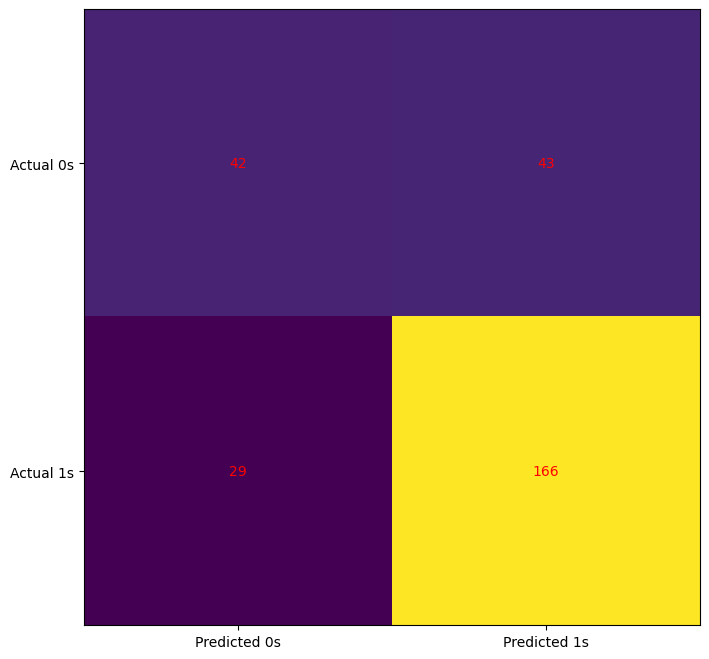

              precision    recall  f1-score   support

           0       0.59      0.49      0.54        85
           1       0.79      0.85      0.82       195

    accuracy                           0.74       280
   macro avg       0.69      0.67      0.68       280
weighted avg       0.73      0.74      0.74       280



In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Making  the Confusion Matrix
cm = confusion_matrix(y_test, nb_predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
# Metrics 
print(classification_report(y_test, nb_predictions))

# RandomForestClassifier

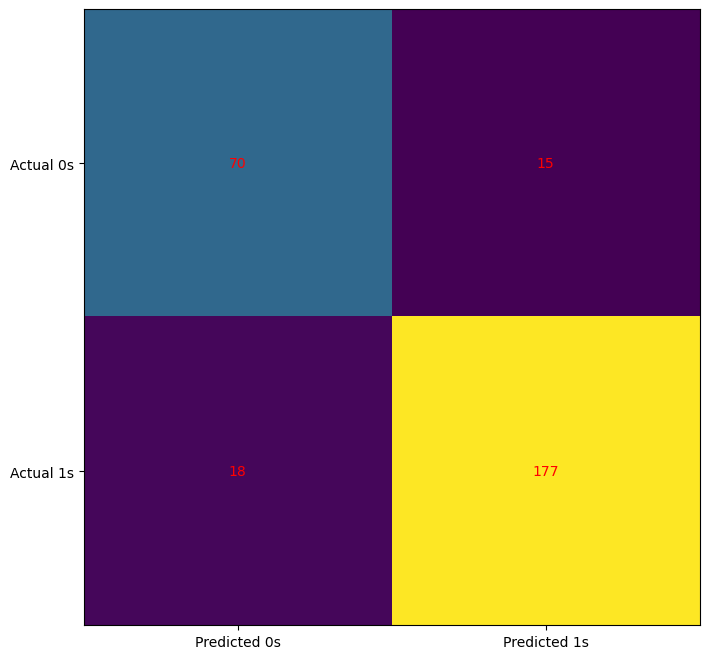

accuracy 0.8821428571428571
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        85
           1       0.92      0.91      0.91       195

    accuracy                           0.88       280
   macro avg       0.86      0.87      0.86       280
weighted avg       0.88      0.88      0.88       280



In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Making  the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print("accuracy",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# K-nearest neighbors classifier

In [15]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
K_nearest_classifier = KNeighborsClassifier(n_neighbors=7, metric="minkowski", p=2)
#classifier = KNeighborsClassifier()
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [17]:
#Train Model and Predict
k = int((len(X_train)*70)/100)
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=70% is",accuracy_score(y_test, Pred_y))

Accuracy of model at K=70% is 0.6964285714285714


C:\Users\Nancy\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.80      0.82      0.81        85
           1       0.92      0.91      0.91       195

    accuracy                           0.88       280
   macro avg       0.86      0.87      0.86       280
weighted avg       0.88      0.88      0.88       280



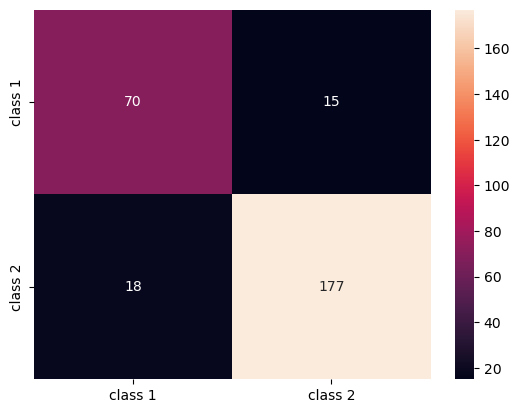

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

C:\Users\Nancy\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nancy\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Nancy\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nancy\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: F

Text(0, 0.5, 'Mean Error')

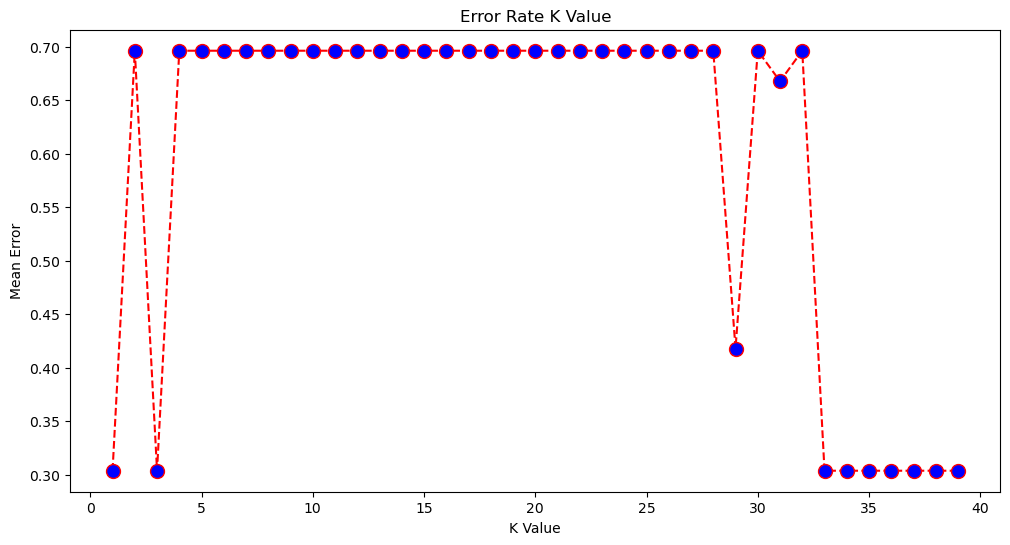

In [19]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test_scaled)
    error.append(np.mean(pred_i != y_test))


plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


C:\Users\Nancy\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Nancy\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Maximum accuracy:- 0.7714285714285715 at K = 11


C:\Users\Nancy\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Nancy\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

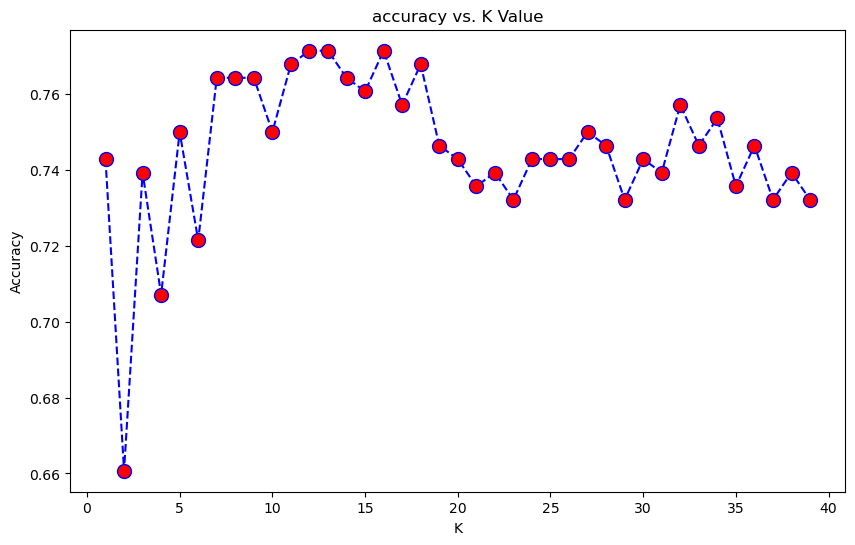

In [20]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [46]:
# fit the data into Classifier Model 
K_nearest_classifier = KNeighborsClassifier(n_neighbors=2, metric="minkowski", p=2)
K_nearest_classifier.fit(X_train, y_train)

# Prediciting 
y_pred = K_nearest_classifier.predict(X_test)

# Evalutaing 
print("Accuracy of model at K= 2  is",accuracy_score(y_test, y_pred))


# Fit the data with a new K 

k =12
print(k)
K_nearest_classifier_new = KNeighborsClassifier(n_neighbors= k , metric="minkowski", p=2)
K_nearest_classifier_new.fit(X_train, y_train)
y_prednew = K_nearest_classifier_new.predict(X_test)
print("Accuracy of model at K= 15  is",accuracy_score(y_test, y_prednew))

Accuracy of model at K= 2  is 0.6607142857142857
12
Accuracy of model at K= 15  is 0.7714285714285715


C:\Users\Nancy\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Nancy\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

# Support Vector Machines

In [47]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

model.fit(X_train, y_train)

predictions = model.predict(X_test)
percentage = model.score(X_test, y_test)
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print("accuracy",accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Confusion Matrix
[[  0  85]
 [  0 195]]
accuracy 0.6964285714285714
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.70      1.00      0.82       195

    accuracy                           0.70       280
   macro avg       0.35      0.50      0.41       280
weighted avg       0.49      0.70      0.57       280



C:\Users\Nancy\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nancy\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nancy\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DT 

In [23]:
import sklearn
print("scikit-learn version: ", sklearn.__version__)

scikit-learn version:  1.0.2


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create Decision Tree classifier object
dt_classifier = DecisionTreeClassifier(criterion='gini', min_samples_split=10)

# Train the model using the training sets
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8678571428571429


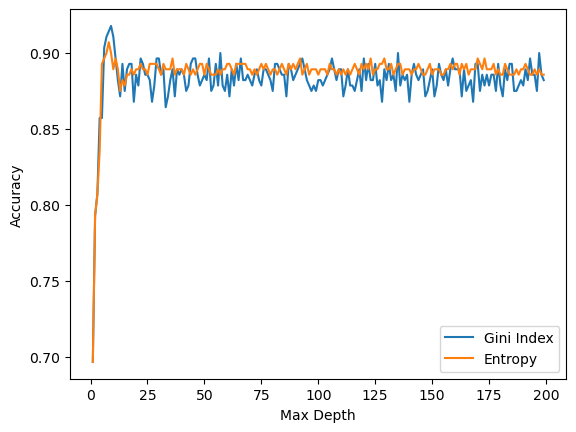

In [25]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

maxd, gini, entropy = [], [], []

# iterate through different maximum depths
for i in range(1, 200):
    
    # train decision tree with gini index
    dtree_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=i, min_samples_split=5)
    dtree_gini.fit(X_train, y_train)
    pred_gini = dtree_gini.predict(X_test)
    gini.append(accuracy_score(y_test, pred_gini))
    
    # train decision tree with entropy
    dtree_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_split=5)
    dtree_entropy.fit(X_train, y_train)
    pred_entropy = dtree_entropy.predict(X_test)
    entropy.append(accuracy_score(y_test, pred_entropy))
    
    maxd.append(i)

# create a dataframe to store the results
d = pd.DataFrame({'gini': pd.Series(gini), 'entropy': pd.Series(entropy), 'max_depth': pd.Series(maxd)})

# visualize the changes in accuracy with different maximum depths
plt.plot('max_depth', 'gini', data=d, label='Gini Index')
plt.plot('max_depth', 'entropy', data=d, label='Entropy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
# create decision tree classifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3)

# train the classifier on the training set
dtree.fit(X_train, y_train)

# make predictions on the testing set
y_pred = dtree.predict(X_test)

# calculate accuracy of the model
print("Testing accuracy rate:", accuracy_score(y_test, y_pred))
print("Training accuracy rate:", dtree.score(X_train, y_train))

Testing accuracy rate: 0.8071428571428572
Training accuracy rate: 0.839142091152815


In [27]:
DT=classification_report(y_test, y_pred)
print(DT)

              precision    recall  f1-score   support

           0       0.77      0.52      0.62        85
           1       0.82      0.93      0.87       195

    accuracy                           0.81       280
   macro avg       0.79      0.73      0.75       280
weighted avg       0.80      0.81      0.79       280



# Bar Graphs 

FOR Fake data

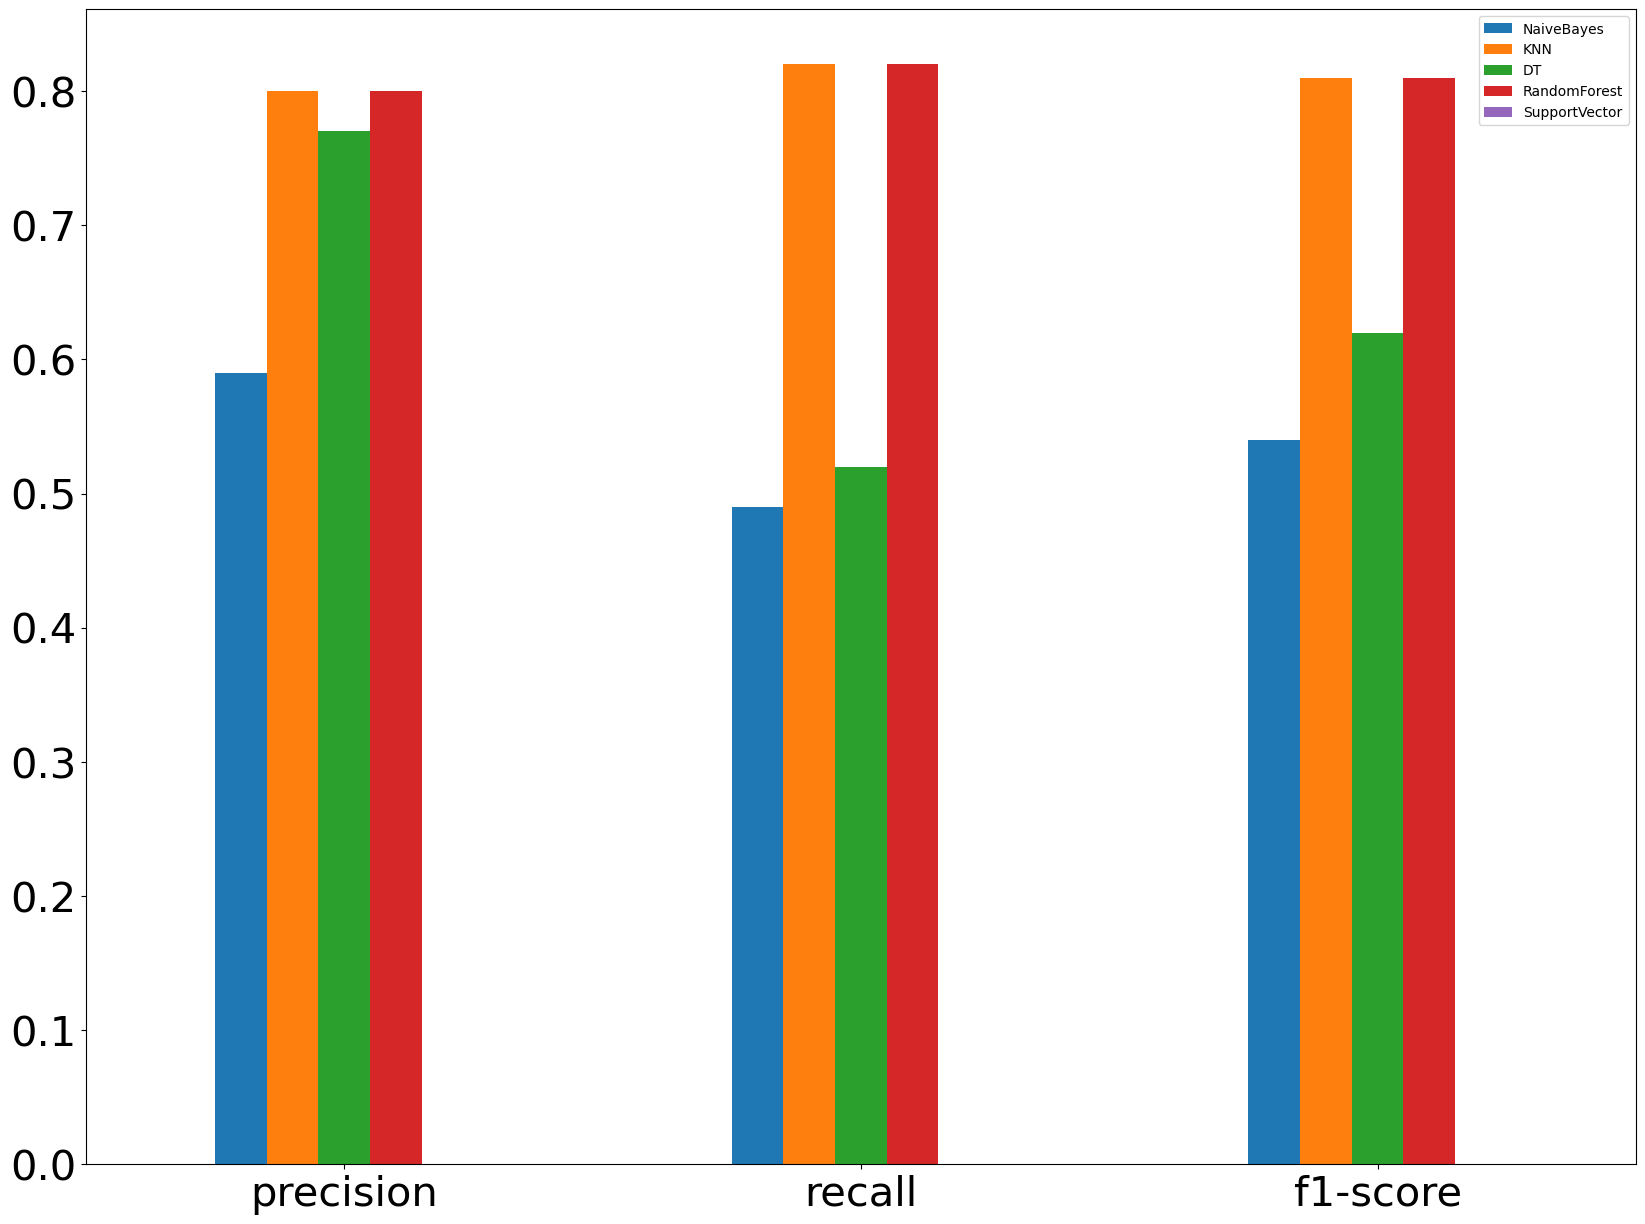

In [35]:
NaiveBayes = [ 0.59,0.49,0.54]
KNN = [0.80,0.82,0.81]
DT=[0.77,0.52,0.62]
RandomForest=[0.80,0.82,0.81]
SupportVector=[0.00,0.00,0.00]
index = ['precision','recall', 'f1-score']
df = pd.DataFrame({'NaiveBayes': NaiveBayes,
                   'KNN': KNN,
                   'DT':DT,
                   'RandomForest':RandomForest,
                   'SupportVector':SupportVector},index=index)
ax = df.plot.bar(rot=0,fontsize = 30)
plt.rcParams["figure.figsize"] = (20, 15)

For real data

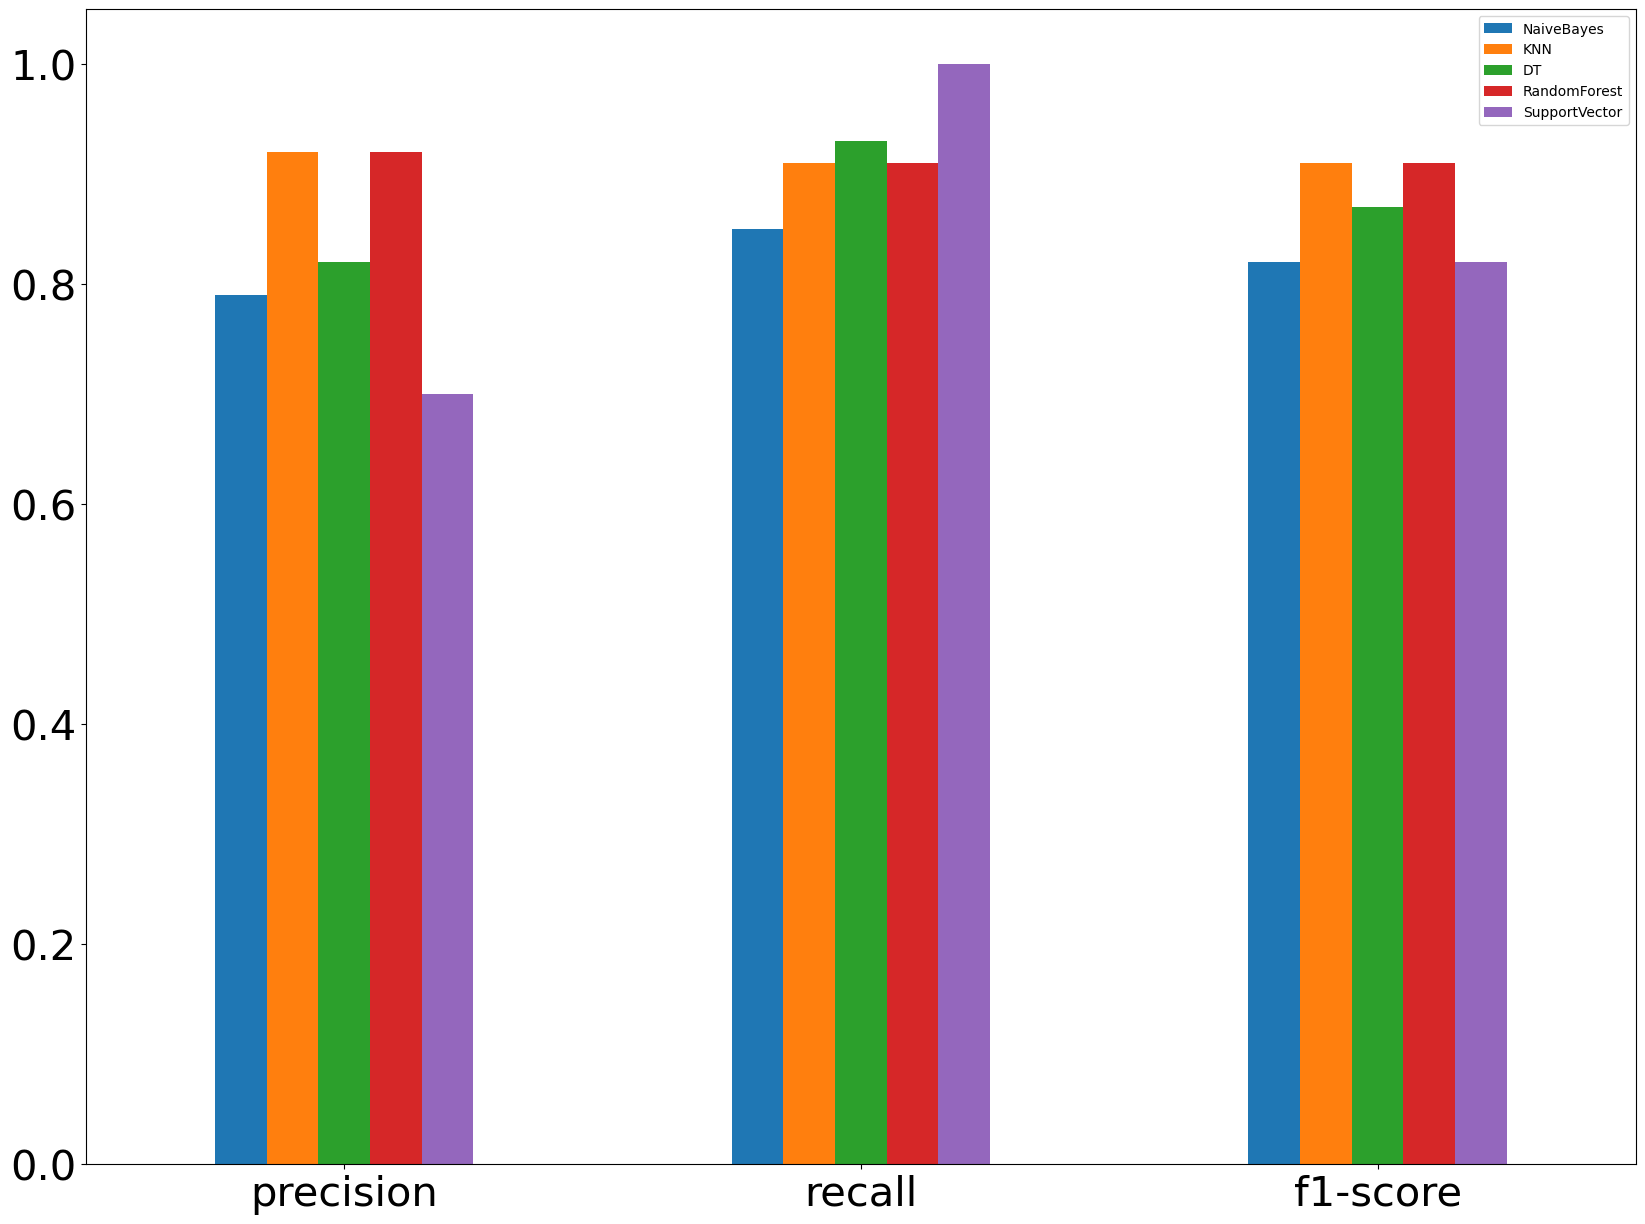

In [37]:
NaiveBayes = [0.79,0.85,0.82]
KNN = [0.92,0.91,0.91]
DT=[0.82,0.93,0.87]
RandomForest=[0.92,0.91,0.91]
SupportVector=[0.70,1.00,0.82]
index = ['precision', 'recall', 'f1-score']
df = pd.DataFrame({'NaiveBayes': NaiveBayes,
                   'KNN': KNN,
                   'DT':DT,
                   'RandomForest':RandomForest,
                   'SupportVector':SupportVector},index=index)
ax = df.plot.bar(rot=0,fontsize = 30)
plt.rcParams["figure.figsize"] = (20, 15)

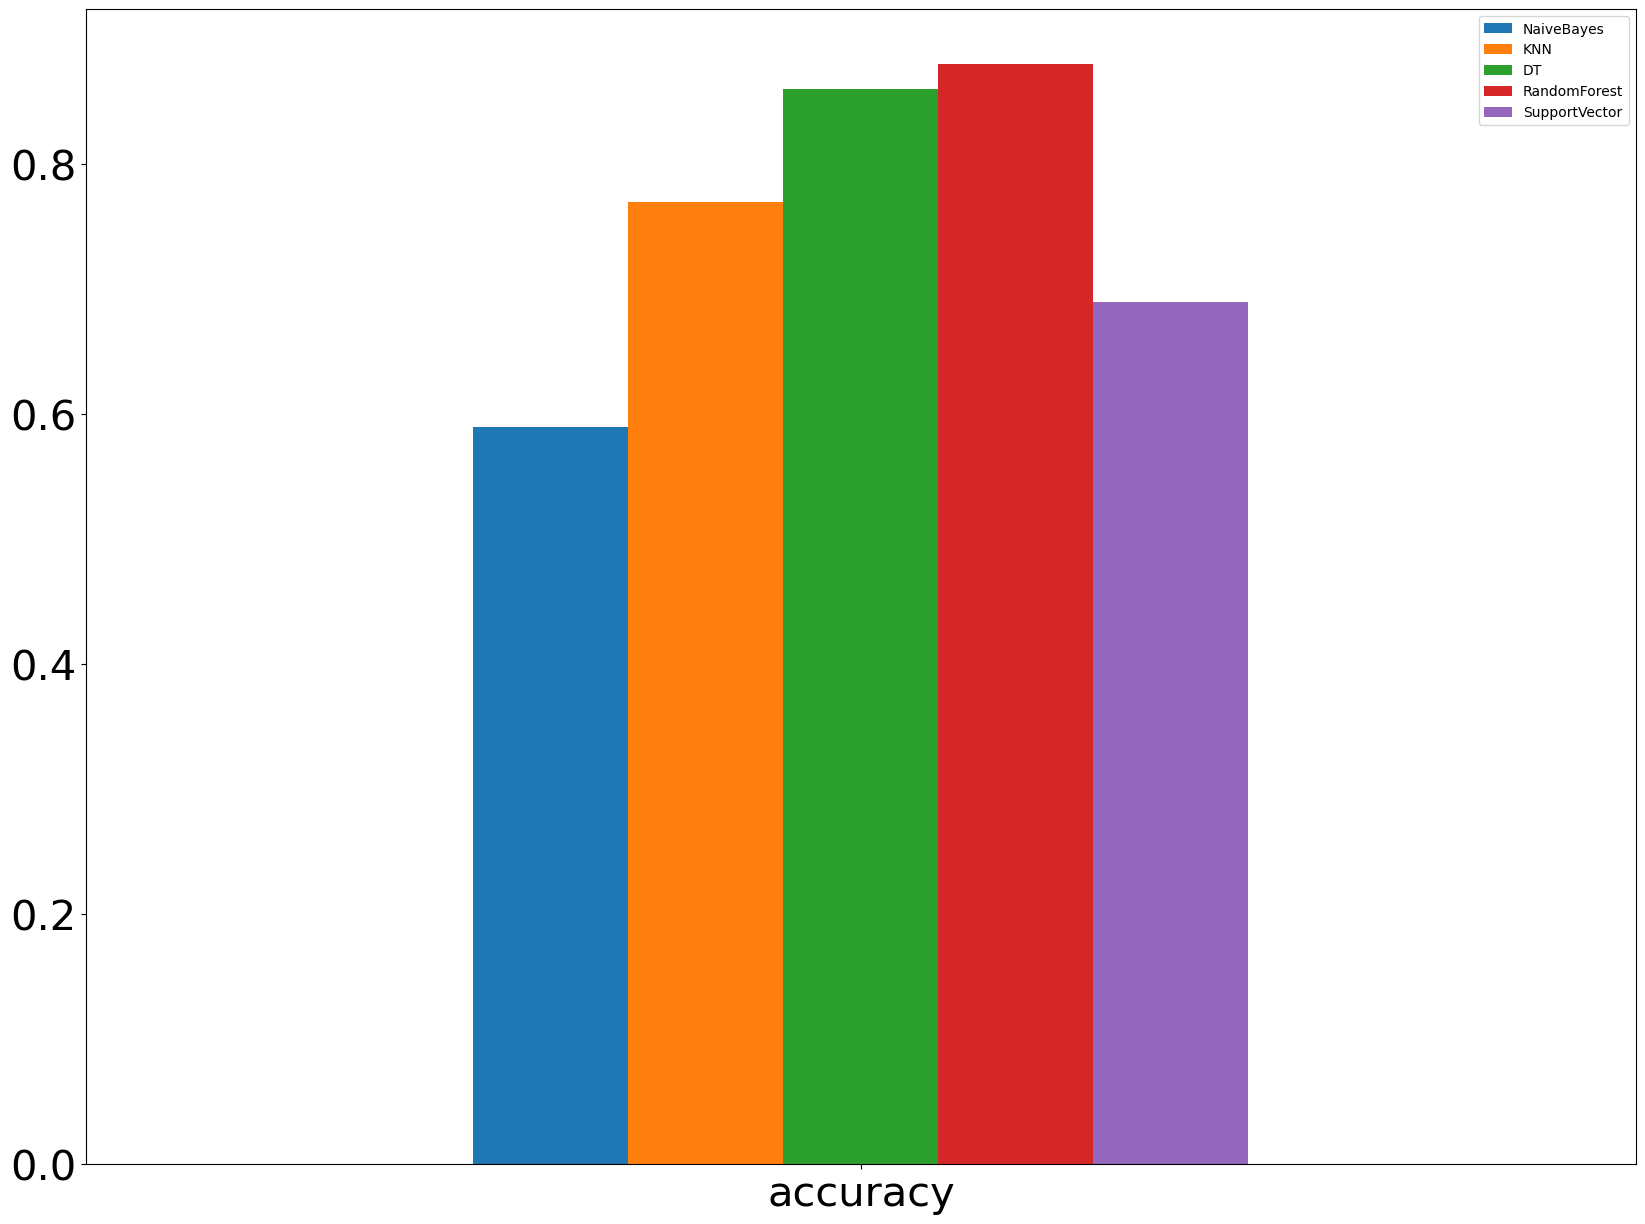

In [64]:
NaiveBayes = [0.74]
KNN = [0.77]
DT=[0.86]
RandomForest=[0.88]
SupportVector=[0.69]
index = ['accuracy']
df = pd.DataFrame({'NaiveBayes': NaiveBayes,
                   'KNN': KNN,
                   'DT':DT,
                   'RandomForest':RandomForest,
                   'SupportVector':SupportVector},index=index)
ax = df.plot.bar(rot=0,fontsize = 30)
plt.rcParams["figure.figsize"] = (20, 15)